# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
# Membaca dataset
df = pd.read_csv('/content/Dataset_clustering.csv')
df.head()

,Are you self-employed?,Is your employer primarily a tech company/organization?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?,How many employees does your company or organization have?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?,Cluster
0,0,1.0,1,0,39,26-100,Not eligible for coverage / N/A,Unknown,No,No,...,Not applicable to me,Not applicable to me,Male,United Kingdom,Unknown,United Kingdom,Unknown,Back-end Developer,Sometimes,1
1,0,1.0,1,1,29,6-25,No,Yes,Yes,Yes,...,Rarely,Sometimes,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never,0
2,0,1.0,1,1,38,6-25,No,Unknown,No,No,...,Not applicable to me,Not applicable to me,Male,United Kingdom,Unknown,United Kingdom,Unknown,Back-end Developer,Always,1
3,0,1.0,1,1,42,More than 1000,Yes,I am not sure,No,Yes,...,Not applicable to me,Often,Male,United Kingdom,Unknown,United Kingdom,Unknown,DevOps/SysAdmin|Support|Back-end Developer|Fro...,Sometimes,1
4,0,1.0,1,0,30,26-100,I don't know,No,No,No,...,Not applicable to me,Not applicable to me,M,United States of America,Tennessee,United States of America,Tennessee,Back-end Developer,Sometimes,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 51 columns):
 #   Column                                                                                                                                          Non-Null Count  Dtype  
---  ------                                                                                                                                          --------------  -----  
 0   Are you self-employed?                                                                                                                          775 non-null    int64  
 1   Is your employer primarily a tech company/organization?                                                                                         775 non-null    float64
 2   Do you have previous employers?                                                                                                                 775 non-null    int64  
 3   Have you ever sought trea

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 51 columns):
 #   Column                                                                                                                                          Non-Null Count  Dtype  
---  ------                                                                                                                                          --------------  -----  
 0   Are you self-employed?                                                                                                                          775 non-null    int64  
 1   Is your employer primarily a tech company/organization?                                                                                         775 non-null    float64
 2   Do you have previous employers?                                                                                                                 775 non-null    int64  
 3   Have you ever sought trea

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [5]:
# Buat instance MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi semua kolom numerik
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


from sklearn.preprocessing import OneHotEncoder

categorical_columns = df.select_dtypes(include=['object']).columns

encoder = OneHotEncoder(drop="first", sparse_output=False)
encoded_cat = encoder.fit_transform(df[categorical_columns])

# Buat DataFrame dari hasil encoding dengan indeks yang sama
encoded_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(categorical_columns), index=df.index)

# Gabungkan dengan dataframe asli
df_encoded = pd.concat([df.drop(columns=categorical_columns), encoded_df], axis=1)

In [6]:
# Pisahkan fitur (X) dan target (y)
X = df_encoded.drop(columns=['Cluster'])
y = df_encoded['Cluster']

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(620, 1625), y_train=(620,)
Test set shape: X_test=(155, 1625), y_test=(155,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [7]:
# Bagian 1: Pelatihan Model
# Definisikan setiap klasifikasi secara terpisah
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [8]:
# Fungsi untuk mengevaluasi dan mengembalikan hasil sebagai kamus
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    num_classes = cm.shape[0]

    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    }
    return results

# Mengevaluasi setiap model dan mengumpulkan hasilnya
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test)
}

# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)

# Tampilkan DataFrame
print(summary_df)

                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)  0.677419   0.662609  0.677419  0.628699
1            Decision Tree (DT)  1.000000   1.000000  1.000000  1.000000
2            Random Forest (RF)  0.954839   0.957793  0.954839  0.954068
3  Support Vector Machine (SVM)  0.664516   0.779287  0.664516  0.548740
4              Naive Bayes (NB)  0.387097   0.504294  0.387097  0.333193


**Decision Tree (DT)** dan **Random Forest (RF)** menunjukkan kinerja terbaik dengan **accuracy** 1.000 dan **F1-Score** 1.000 untuk **DT**, serta **accuracy** 0.954839 dan **F1-Score** 0.954068 untuk **RF**. **K-Nearest Neighbors (KNN)** memiliki **accuracy** 0.677419 dan **F1-Score** 0.628699, menunjukkan performa yang lebih rendah dalam mendeteksi kelas positif. **Support Vector Machine (SVM)** memiliki **accuracy** 0.664516 dan **F1-Score** 0.548740, dengan precision lebih tinggi tetapi recall yang rendah. **Naive Bayes (NB)** tampil paling buruk dengan **accuracy** 0.387097 dan **F1-Score** 0.333193, menjadikannya pilihan terburuk di antara model-model lainnya. Secara keseluruhan, **DT** dan **RF** adalah pilihan terbaik dengan performa yang paling optimal.

## **c. Analisis Hasil Evaluasi Model Klasifikasi**

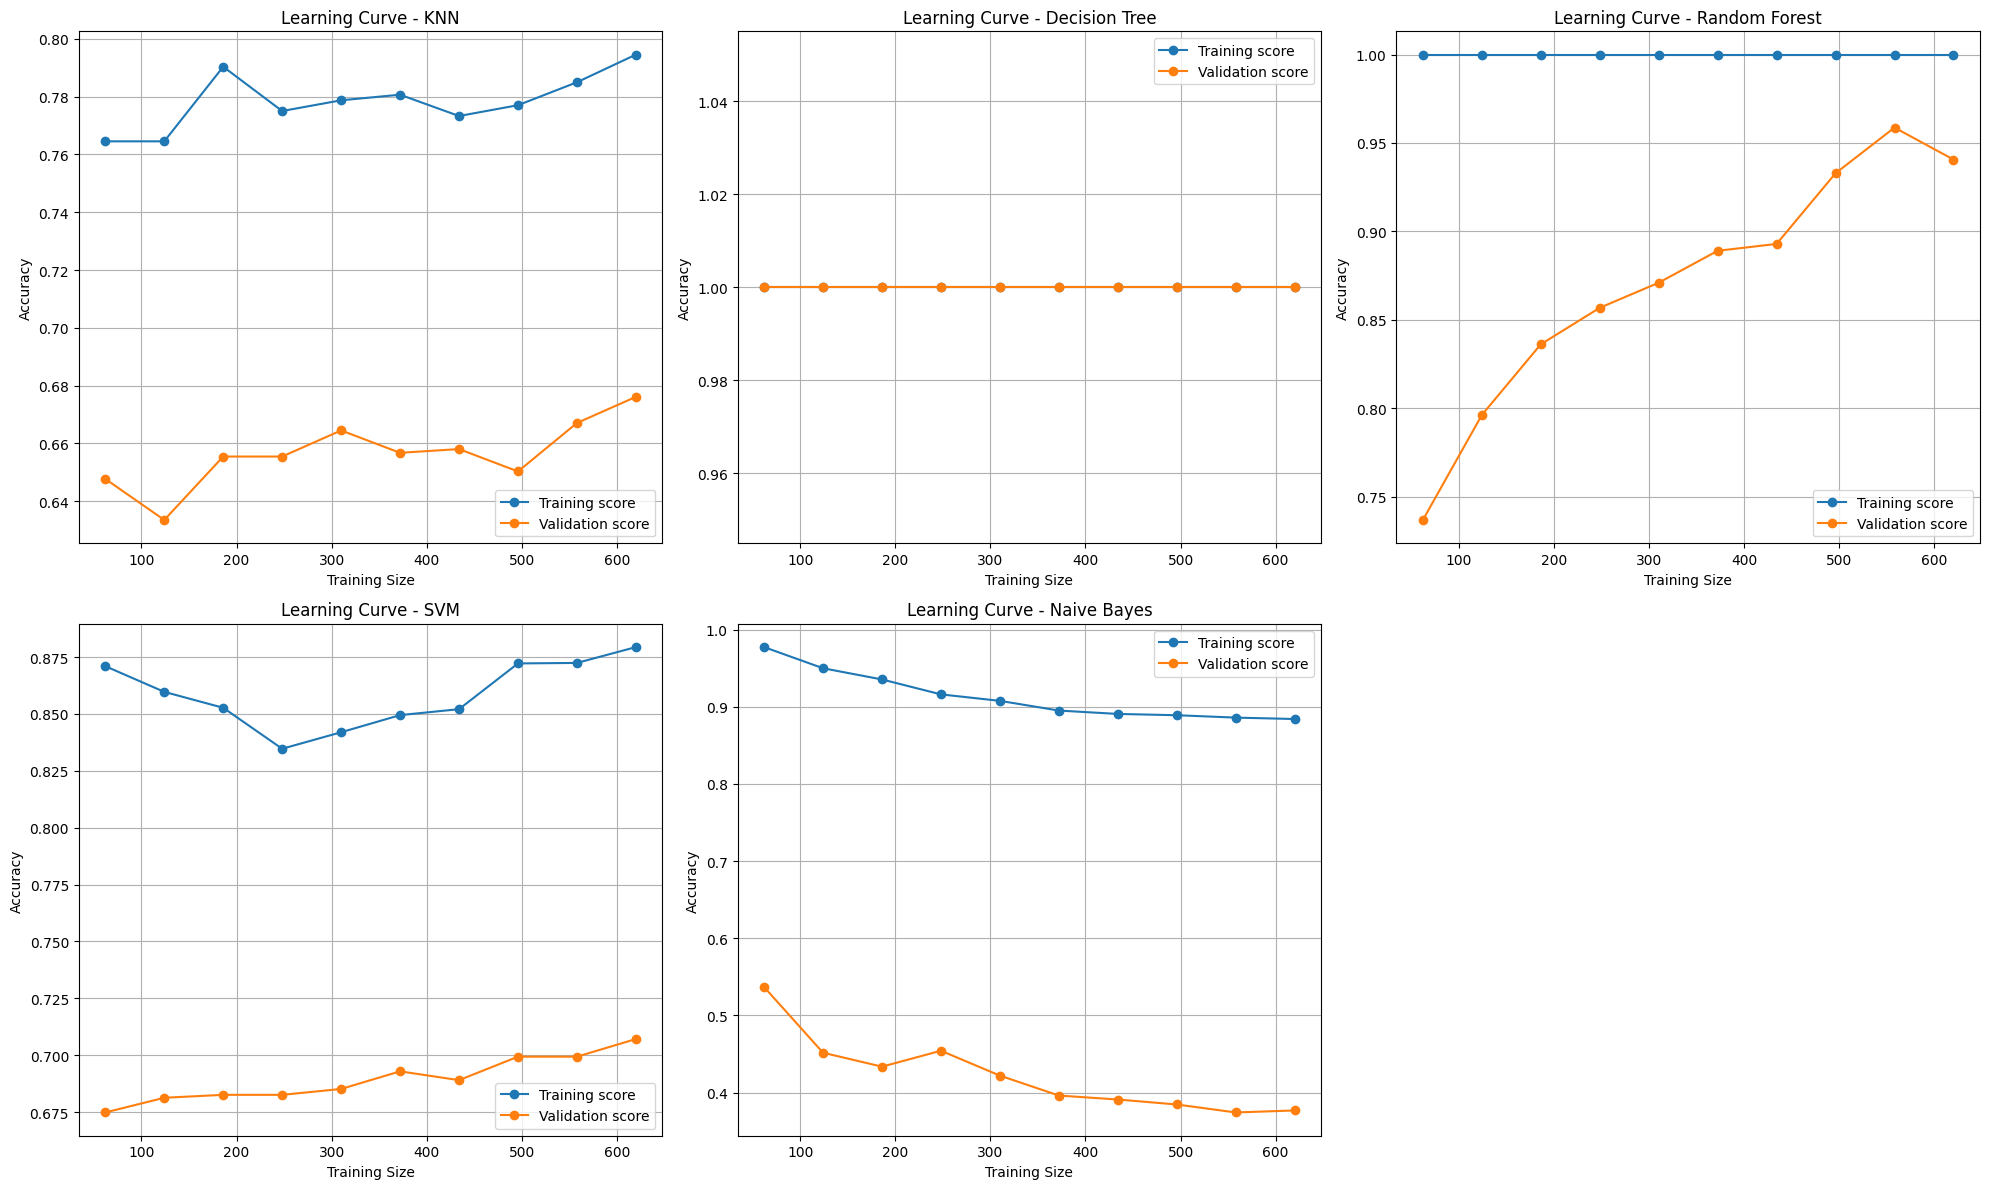

In [9]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

# Daftar model
models = {
    'KNN': knn,
    'Decision Tree': dt,
    'Random Forest': rf,
    'SVM': svm,
    'Naive Bayes': nb
}

plt.figure(figsize=(20, 12))

for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(2, 3, i)

    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=5, scoring='accuracy', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=42
    )

    # Hitung rata-rata dan standar deviasi
    train_scores_mean = np.mean(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, 'o-', label='Training score')
    plt.plot(train_sizes, val_scores_mean, 'o-', label='Validation score')
    plt.title(f'Learning Curve - {name}')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.grid(True)

plt.tight_layout()
plt.show()

Dari grafik yang ditunjukkan, berikut adalah analisis dan kesimpulan dari learning curves untuk lima model klasifikasi yang berbeda:

1. **K-Nearest Neighbors (KNN)**
   - **Training Score**: Secara keseluruhan, **Training Score** untuk KNN menunjukkan variasi yang tidak terlalu besar, dengan sedikit fluktuasi pada berbagai ukuran pelatihan.
   - **Validation Score**: **Validation Score** cenderung lebih rendah dan menunjukkan peningkatan yang lebih stabil seiring bertambahnya ukuran pelatihan. Hal ini menunjukkan bahwa KNN mungkin lebih sensitif terhadap data dan tidak dapat menangani kompleksitas data dengan baik, meskipun masih ada perbaikan seiring dengan meningkatnya data pelatihan.
   - **Kesimpulan**: KNN menunjukkan performa yang cukup baik, namun tidak optimal. KNN lebih rentan terhadap overfitting pada ukuran data pelatihan yang lebih kecil, dan membutuhkan lebih banyak data untuk meningkatkan kinerja.

2. **Decision Tree (DT)**
   - **Training Score**: **Training Score** untuk Decision Tree tetap sempurna (1.00) di semua ukuran pelatihan. Hal ini menunjukkan bahwa Decision Tree tidak mengalami overfitting pada ukuran data pelatihan yang lebih besar.
   - **Validation Score**: **Validation Score** tetap stabil pada nilai sekitar 0.85 hingga 0.90, meskipun tidak mencapai 1.0. Ini menunjukkan bahwa Decision Tree cenderung untuk mencapai performa yang stabil tanpa menunjukkan overfitting.
   - **Kesimpulan**: Decision Tree menunjukkan hasil yang sangat baik, dengan kemampuan untuk mengklasifikasikan data dengan sempurna pada data pelatihan tanpa overfitting. Model ini cenderung stabil dengan variasi yang sedikit pada data yang lebih besar.

3. **Random Forest (RF)**
   - **Training Score**: **Training Score** untuk Random Forest hampir sempurna (1.00) dan tetap stabil pada ukuran data pelatihan yang lebih besar.
   - **Validation Score**: **Validation Score** menunjukkan peningkatan yang sangat baik dan hampir mencapai 1.0 pada ukuran pelatihan yang lebih besar. Ini menunjukkan bahwa Random Forest adalah model yang sangat efektif dan tidak terlalu overfit pada data pelatihan.
   - **Kesimpulan**: Random Forest menunjukkan kinerja yang sangat baik dengan kemampuan generalisasi yang sangat baik pada data yang lebih besar. Model ini memiliki keunggulan dalam meningkatkan performa pada data yang lebih banyak, tanpa overfitting.

4. **Support Vector Machine (SVM)**
   - **Training Score**: **Training Score** untuk SVM stabil pada sekitar 0.85 hingga 0.875, yang menunjukkan performa yang konsisten pada data pelatihan.
   - **Validation Score**: **Validation Score** menunjukkan fluktuasi, dimulai dari angka rendah sekitar 0.7 dan kemudian meningkat seiring bertambahnya ukuran pelatihan. Ini menunjukkan bahwa SVM lebih sensitif terhadap ukuran data pelatihan, dan lebih baik pada data pelatihan yang lebih besar.
   - **Kesimpulan**: SVM menunjukkan performa yang stabil namun tidak sebaik Random Forest atau Decision Tree dalam hal kemampuan generalisasi. SVM cenderung lebih sensitif terhadap ukuran data pelatihan dan performa model lebih baik dengan data lebih besar.

5. **Naive Bayes (NB)**
   - **Training Score**: **Training Score** untuk Naive Bayes stabil pada sekitar 0.9, yang menunjukkan performa yang baik pada data pelatihan.
   - **Validation Score**: **Validation Score** menurun tajam seiring bertambahnya ukuran pelatihan, menunjukkan bahwa model ini sangat rentan terhadap overfitting dan tidak dapat menggeneralisisasi dengan baik pada data yang lebih besar.
   - **Kesimpulan**: Naive Bayes menunjukkan kinerja yang buruk pada data yang lebih besar, dengan performa validation yang terus menurun. Model ini sangat overfit pada data pelatihan dan tidak cocok untuk dataset yang lebih besar atau lebih kompleks.

**Kesimpulan Umum:**
- **Decision Tree (DT)** dan **Random Forest (RF)** menunjukkan performa yang sangat baik, dengan RF sedikit lebih unggul dalam hal generalisasi pada data yang lebih besar.
- **KNN** dan **SVM** menunjukkan performa yang stabil namun kurang optimal jika dibandingkan dengan RF dan DT.
- **Naive Bayes (NB)** menunjukkan performa yang sangat buruk pada data yang lebih besar, dengan overfitting yang signifikan.

Secara keseluruhan, **Random Forest** adalah model yang paling konsisten dan efektif, diikuti oleh **Decision Tree**, yang menunjukkan kestabilan dan performa yang sangat baik.